# Import  Data

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dept_df = pd.read_csv('./deptinfo.csv')
sku_df = pd.read_csv('./skuinfo.csv')
str_df = pd.read_csv('./strinfo.csv')
transact_df = pd.read_csv('./trnsact_sample.csv')
skst_df = pd.read_csv('./skstinfo_sample.csv')

In [6]:
dept_df.head()

,DEPT,DEPTDESC
0,800,CLINIQUE
1,801,LESLIE
2,1100,GARY F
3,1107,JACQUES
4,1202,CABERN


In [7]:
sku_df.head()

,SKU,DEPT,CLASSID,UPC,STYLE,COLOR,SIZE,PACKSIZE,VENDOR,BRAND
0,3,6505,113,400000003000,00 F55KT2,WHISPERWHITE,P8EA,1,5119207,TURNBURY
1,4,8101,002,400000004000,22 615CZ4,SPEARMI,S,1,3311144,C A SPOR
2,5,7307,003,400000005000,7LBS 245-01,34 SILVER,KING,1,5510554,BEAU IDE
3,8,3404,00B,400000008000,622 F05H84,MORNING MI,2T,1,2912827,HARTSTRI
4,15,2301,004,400000015000,126 MDU461,255CAMEL,12,1,23272,JONES/LA


In [8]:
str_df.head()

,STORE,CITY,STATE,ZIP
0,2,ST. PETERSBURG,FL,33710
1,3,ST. LOUIS,MO,63126
2,4,LITTLE ROCK,AR,72201
3,7,FORT WORTH,TX,76137
4,9,TEMPE,AZ,85281


In [5]:
transact_df.tail(10)

,SKU,STORE,REGISTER,TRANNUM,SALEDATE,SEQ,INTERID,STYPE,QUANTITY,ORGPRICE,AMT,MIC
1209158,8803,500,4500,81707633,2004-08-06,P,1,13.5,13.5,13.5,599000129,281
1209159,9202,320,400,454406412,2005-05-27,P,1,13.5,13.5,13.5,113500098,281
1209160,9204,560,9200,0,2005-04-09,P,1,13.5,13.5,13.5,611200125,281
1209161,9204,620,1500,0,2005-03-22,P,1,13.5,13.5,13.5,585900071,281
1209162,9304,370,1100,0,2004-10-03,P,1,13.5,13.5,13.5,25000163,281
1209163,9402,530,4200,0,2004-12-23,P,1,13.5,13.5,13.5,339400245,281
1209164,9404,530,300,0,2004-10-29,P,1,13.5,13.5,13.5,239600071,281
1209165,9409,540,7600,0,2005-04-14,P,1,13.5,13.5,13.5,512200066,281
1209166,9504,580,600,569000627,2005-07-17,P,1,14.0,14.0,14.0,772600072,281
1209167,9609,440,1700,239708823,2004-12-16,P,1,13.5,13.5,13.5,158900169,281


In [10]:
skst_df.head()

,SKU,STORE,COST,RETAIL
0,3,102,123.36,440.0
1,45,3504,20.66,59.0
2,45,8402,20.66,59.0
3,45,9304,20.66,59.0
4,78,3702,24.30,40.2


# EDA

### number of SKUs

In [12]:
sku_df.SKU.value_counts()

3          1
6659825    1
6659867    1
6659864    1
6659862    1
          ..
3336774    1
3336770    1
3336759    1
3336758    1
9999997    1
Name: SKU, Length: 1556039, dtype: int64

~1.5 M SKUs. Therefore, if we do a ML problem on regression of profit margin, then we would need to do it on 1.5M rows (quite time-consumingto train).

### number of items per basket

In [19]:
transact_df.TRANNUM.value_counts()

0            747890
823508118        13
860108579        12
644507320        10
305404014         9
              ...  
486208083         1
102705538         1
618208961         1
412702896         1
239708823         1
Name: TRANNUM, Length: 414662, dtype: int64

On a proportion, there are 4.14 M transactions, which is also quite time consuming to train. 

### number of stores

In [15]:
skst_df.STORE.value_counts()

2203    2146
8402    2107
209     1922
1509    1905
9103    1900
        ... 
100       16
700       15
900       12
5306       2
800        1
Name: STORE, Length: 349, dtype: int64

349 distinct stores in the resampled data

### most frequently purchased items

In [17]:
skst_df.SKU.value_counts()

2007741    13
4177422    13
5690069    12
5584607    12
2104124    11
           ..
4187462     1
4187558     1
4187563     1
4187567     1
4949125     1
Name: SKU, Length: 215780, dtype: int64

Total 215K distinct items. Max items sold is 13.

### busiest stores

In [16]:
transact_df.STORE.value_counts()

320    17244
180    17004
330    16897
230    16868
290    16647
       ...  
202        2
252        2
292        2
182        1
212        1
Name: STORE, Length: 298, dtype: int64

Store 320 with 17k transaction. Note this is resampled

(array([1.75396e+05, 1.30271e+05, 3.62810e+04, 3.82220e+04, 5.84400e+03,
        1.14000e+03, 6.96000e+02, 3.80000e+02, 1.60000e+02, 1.00000e+02,
        7.40000e+01, 5.20000e+01, 4.80000e+01, 3.30000e+01, 2.20000e+01,
        1.50000e+01, 1.00000e+01, 9.00000e+00, 9.00000e+00, 4.00000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 20 artists>)

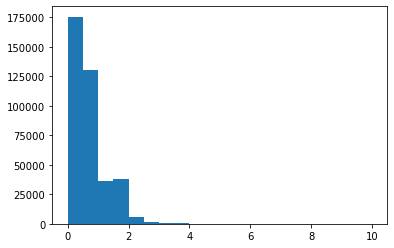

In [24]:
skst_df['PROFIT'] = skst_df['COST'] / skst_df['RETAIL']
skst_df['PROFIT'] = skst_df['PROFIT'].replace([np.inf, -np.inf], np.nan).dropna()
plt.hist(skst_df['PROFIT'], bins=20, range=(0, 10))  # Adjust the range and bin count as needed

In [28]:
skst_grouped = skst_df.groupby(['SKU'])['PROFIT'].mean().reset_index()
skst_grouped
skst_grouped

,SKU,PROFIT
0,3,0.280364
1,45,0.350169
2,78,0.604478
3,105,0.410714
4,149,0.447059
...,...,...
215775,9999956,0.489492
215776,9999960,0.425000
215777,9999967,0.400000
215778,9999974,0.731707


In [11]:
transact_df.SEQ.value_counts()

P    1116399
R      92769
Name: SEQ, dtype: int64

The amount of returns is 10% of the amount of purchases. (but keep in mind if we undersample there are still over 1.8M entries). One thing could be to look WHETHER an SKU an been returned or not. 

Store level data that we can incorporate is for each store zipcode, have the demographic informaiton (population, income, etc..)|

This leads to the third idea: store-level ML. Predict the demand of each store from features like the number of items sold in that store, % of return rate inside that store, avg. profit margin inside that store. Because there are only 400 stores. Very easy to build ML models. 